# Exercice: optimal strategy for the game "Can't stop" with only one ladder

## Model

We consider a ladder that has $n$ steps. You start with an anchor at position $0$. Then at each time step:
- You can decide to thow a dice, in which case:
  - with probability $p$ you progress
  - with probabiity $p$ you fall to the last anchor
- You can decide to build an anchor at your current position

Building an anchor or falling cost $1$. 

## Exercice 

The goal of this notebook is to:
* Derive Bellman's equation for this problem
* Implement an algorithm (based on value iteration) to sovle them. 
* Show how we can use it to explore structural properties of the optimal policies

## MDP and Bellman's equation
Consider a state $(i,j)$ where $i$ is the position of your last anchor and $j\ge i$ is your current position. 

Bellman's equation is:
$$ v(i,j) = \left\{\begin{array}{ll}
0 &\mathrm{if~}j=n\\ 
max( -1 + V(j,j) , 0.8 V(i,j+1) + 0.2 (-1 + V(i,i) ) )
&\mathrm{otherwise}\end{array}\right.$$

The first line is when you reach n
In the second, the first term corresponds to building an anchor. The second term correspond to throwing the dice

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Value iteration 

In [13]:
def valueIteration(n,p,gamma=1,epsilon=1e-4):
    V = np.zeros((n,n+1))
    for k in range(10000):
        newV = np.zeros((n,n+1))
        for i in range(n):
            for j in range(i,n):
                newV[i,j] = max(-1+gamma*V[j,j], gamma*(p*V[i,j+1]+(1-p)*(-1+V[i,i])))
        if np.max(abs(V-newV)) <= epsilon:
            print('Convergence in ',k,'iterations')
            return V
        V = newV
    return V
def bestPolicy(n,p):
    V = valueIteration(n,p)
    pi = np.zeros((n,n))
    for i in range(n):
        for j in range(i,n):
            pi[i,j] = 1 if -1+V[j,j] > p*V[i,j+1]+(1-p)*(-1+V[i,i]) else -1
    return pi

In [14]:
n=8
p=0.7
#valueIteration(n,p)
valueIteration(n,p),bestPolicy(n,p)

Convergence in  61 iterations
Convergence in  61 iterations


(array([[-6.87125571, -6.44281113, -5.83071296, -4.95624705, -4.08163265,
         -2.9154496 , -2.04081633, -1.42857143,  0.        ],
        [ 0.        , -5.9968571 , -5.56835198, -4.95618248, -4.08163265,
         -2.9154496 , -2.04081633, -1.42857143,  0.        ],
        [ 0.        ,  0.        , -4.83083738, -4.40228439, -3.79006072,
         -2.9154496 , -2.04081633, -1.42857143,  0.        ],
        [ 0.        ,  0.        ,  0.        , -3.95625137, -3.52768485,
         -2.91544554, -2.04081633, -1.42857143,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        , -3.08163265,
         -2.65306122, -2.04081633, -1.22448979,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         -1.91545007, -1.48687917, -0.87463488,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -1.04081633, -0.6122449 ,  0.        ],
        [ 0.        ,  0.        ,  0.        , 

## Numerical observations

When applying the optimal policy, you will start in state 0, then try (successfully or unsuccessfully) to climb until a position at which you build an anchor. After that, you will continue until you reach the next anchor, etc. 

This implies that the optimal policy that you apply at the end can be described in a compact way by a set of anchoring positions. The following algorithm shows how to compute it


In [15]:
def whereToStop(n,p):
    pi = bestPolicy(n,p)
    stop=[]
    i=0
    for j in range(n):
        if pi[i,j]==1: 
            stop.append(j)
            i=j
    return stop


## Based on the above, we can explore numerically whe optimal policy

What we observe from the results below is that the optimal anchors seem to be to attach oneself regularly. 
(note: this can be probably proven using convexity properties)


Convergence in  434 iterations
Convergence in  216 iterations
Convergence in  143 iterations
Convergence in  107 iterations
Convergence in  85 iterations
Convergence in  71 iterations
Convergence in  61 iterations
Convergence in  55 iterations
Convergence in  52 iterations
Convergence in  72 iterations
Convergence in  61 iterations
Convergence in  67 iterations
Convergence in  64 iterations
Convergence in  73 iterations
Convergence in  59 iterations
Convergence in  102 iterations
Convergence in  61 iterations
Convergence in  34 iterations
Convergence in  0 iterations


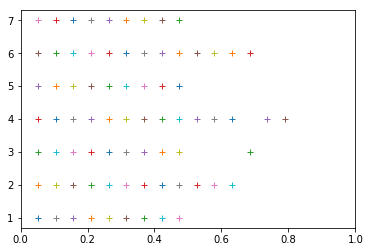

In [16]:
for p in np.linspace(0,1,20):
    stops=whereToStop(n,p)
    for stop in stops: plt.plot(p,stop,'+')
    plt.xlim(0,1)

In [17]:
for p in np.linspace(0,1,20):
    stops=whereToStop(10,p)
    for stop in stops: plt.plot(p,stop,'+')
    plt.xlim(0,1)

Convergence in  497 iterations
Convergence in  248 iterations
Convergence in  165 iterations
Convergence in  124 iterations
Convergence in  99 iterations
Convergence in  83 iterations
Convergence in  71 iterations
Convergence in  64 iterations
Convergence in  61 iterations
Convergence in  83 iterations
Convergence in  69 iterations
Convergence in  75 iterations
Convergence in  72 iterations
Convergence in  76 iterations
Convergence in  83 iterations
Convergence in  102 iterations
Convergence in  93 iterations
Convergence in  47 iterations
Convergence in  0 iterations


Convergence in  786 iterations
Convergence in  396 iterations
Convergence in  266 iterations
Convergence in  202 iterations
Convergence in  163 iterations
Convergence in  137 iterations
Convergence in  120 iterations
Convergence in  108 iterations
Convergence in  103 iterations
Convergence in  130 iterations
Convergence in  110 iterations
Convergence in  110 iterations
Convergence in  113 iterations
Convergence in  115 iterations
Convergence in  111 iterations
Convergence in  121 iterations
Convergence in  135 iterations
Convergence in  157 iterations
Convergence in  0 iterations


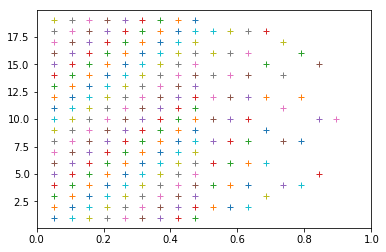

In [65]:
for p in np.linspace(0,1,20):
    stops=whereToStop(20,p)
    for stop in stops: plt.plot(p,stop,'+')
    plt.xlim(0,1)